In [4]:
import numpy as np
dataset = np.array (((1,5),(3,4),(4,2),(10,12)))

def kernalfuntion(x,z):
    return (1+np.dot(x,z))**2

gm = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        gm[i,j] = kernalfuntion(dataset[i] , dataset[j])
        
print("The gram matrix obtained\n",gm)       


The gram matrix obtained
 [[  729.   576.   225.  5041.]
 [  576.   676.   441.  6241.]
 [  225.   441.   441.  4225.]
 [ 5041.  6241.  4225. 60025.]]


In [7]:
eigenvalues = np.linalg.eigvals(gm)
print("Eigen values:\n",eigenvalues)

Eigen values:
 [6.13971435e+04 3.82206067e+02 8.15317855e+01 1.01186495e+01]


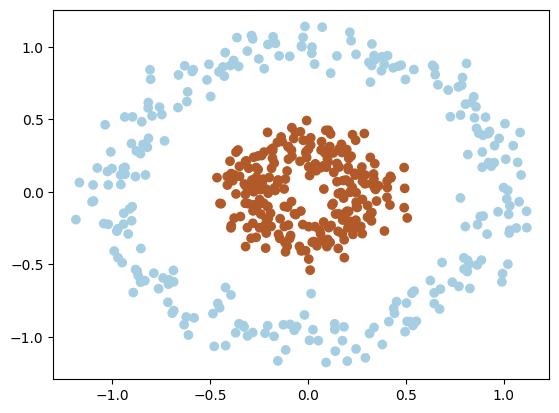

In [8]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import make_circles
# Generate data with make_circles
np . random . seed (5)
X , y = make_circles ( n_samples =500 , factor =0.3 , noise =0.1)

plt.scatter (X [:, 0], X [:, 1], c=y, cmap=plt.cm.Paired)

In [10]:
def phi(X):
    sol = np.zeros(( X.shape[0],3))
    sol[:,:2] =X
    sol[:,2] = X[:,0]**2 + X[:,1]**2
    return sol
print(phi(X))

[[ 0.971623   -0.13701563  0.96282455]
 [ 0.10723999 -0.24657232  0.07229833]
 [-0.30846839  0.97209521  1.04012185]
 ...
 [ 0.4924193  -0.1087132   0.25429533]
 [ 0.49702718 -0.96517383  1.17859653]
 [-0.12028368  0.02002156  0.01486903]]


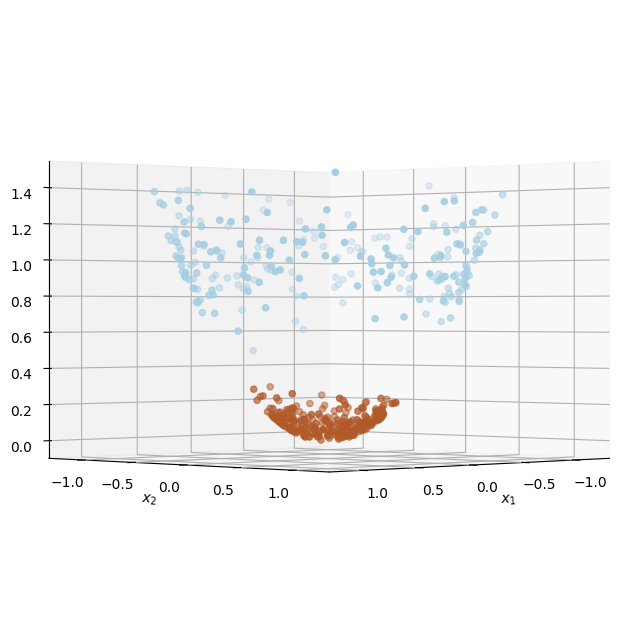

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

mapping1 = phi(X)
ax.scatter(mapping1[:, 0], mapping1[:, 1], mapping1[:, 2], c= y,cmap=plt.cm.Paired)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_1^2 + x_2^2$')
ax.view_init(0, 45)
plt.show()


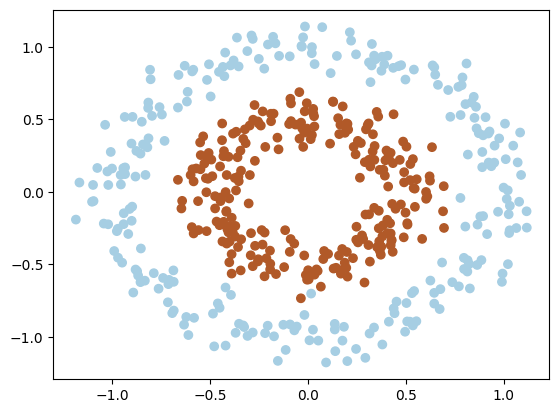

In [17]:
np.random.seed (5)
X2 , y2 = make_circles ( n_samples =500 , factor =0.5 , noise =0.1)
plt.scatter (X2[:, 0], X2 [:, 1], c=y2, cmap=plt.cm.Paired)

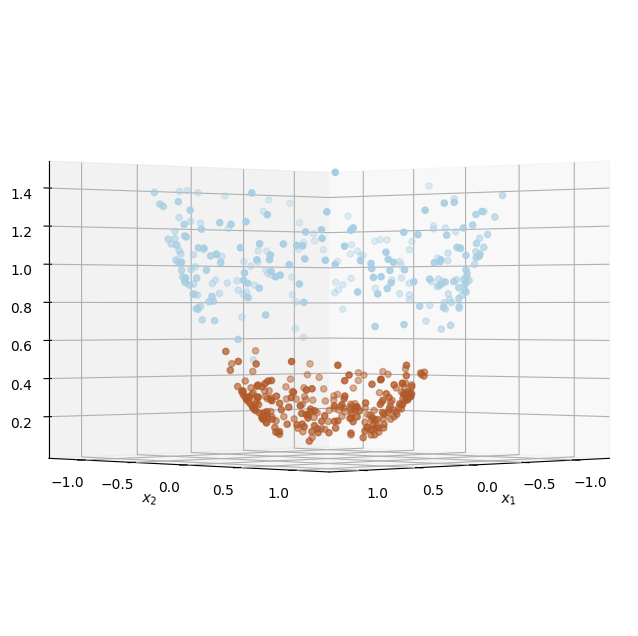

In [23]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

mapping2 = phi(X2)
ax.scatter(mapping2[:, 0], mapping2[:, 1], mapping2[:, 2], c= y2, cmap=plt.cm.Paired)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_1^2 + x_2^2$')
ax.view_init(0, 45)
plt.show()

In [24]:
def phi1(X):
    sol = np.zeros((X.shape[0] , 3))
    sol[:,0] = X[:,0]**2
    sol[:,1] = X[:,1]**2
    sol[:,2] = X[:,0]*X[:,1]
    return sol

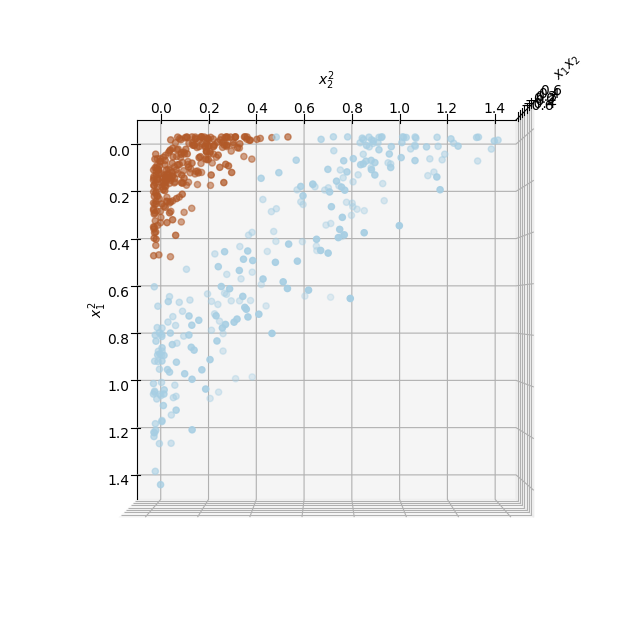

In [25]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
mapping3 = phi1(X2)
ax.scatter(mapping3[:, 0], mapping3[:, 1], mapping3[:, 2], c= y2, cmap=plt.cm.Paired)

# Set labels for the axes
ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$x_2^2$')
ax.set_zlabel('$x_1 x_2$')
ax.view_init(90,0,0)
# Show the plot
plt.show()

In [26]:
from sklearn import svm
from sklearn.metrics import accuracy_score

SVM_classifier = svm.SVC(kernel='linear')
model_for_original = SVM_classifier.fit(X,y)
y_pred_original = model_for_original.predict(X)
print("Accuracy for original dataset:", accuracy_score(y, y_pred_original))

model_for_projected = SVM_classifier.fit(mapping1,y)
y_pred_projected = model_for_projected.predict(mapping1)
print("Accuracy for projected dataset:", accuracy_score(y, y_pred_projected))

Accuracy for original dataset: 0.668
Accuracy for projected dataset: 1.0
